# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1381: Петров Александр Сергеевич и Исайкин Георгий Иванович. Вариант №4.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.



## Основные теоретические понятия

- Дискретное время - время, измеренное в единицах времени nT, где $ n \in \mathbb{Z} $, а $ T \in \mathbb{R} $ - шаг дискретизации (период дискретизации).

- Дискретное нормированное время - это время, измеренное в единицах n, где $ n \in \mathbb{Z} $

1) Дискретный единичный цифровой импульс:
    $$ \delta_{d}(k) = \begin{cases} 1, k = 0 \\ 0, k \ne 0 \end{cases} $$

    Является дискретным аналогом дельта-функции (функции Дирака):
    $$ \delta_{d}(k) = \begin{cases} \infty, t = 0 \\ 0, t \ne 0 \end{cases} $$

2) Дискретный единичный скачок:
    $$ \sigma_{d}(k) = \begin{cases} 1, k \ge 0 \\ 0, k < 0 \end{cases} $$

    Является дискретным аналогом функции единичного скачка (функция Хевисайда):
    $$ \sigma_{d}(k) = \begin{cases} 1, t > 0 \\ \text{0.5 или неопределена, t = 0} \\ 0, t < 0 \end{cases} $$

3) Дискретная экспоненциальная функция:
    $$ s_{1}(k) = \begin{cases} a^{k}, k \ge 0 \\ 0, k < 0 \end{cases} $$

4) Дискретный комплесный гармонический сигнал:
    $$ s_{2}(k) = C \exp(j \hat{w_0} k) $$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [34]:
# Импорт библиотек.
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Отображение и построение графиков.
class sub_plt():
    def __init__(self, title, x, y, x_label, y_label, pos):
        self.title=title
        self.x=x
        self.y=y
        self.x_label=x_label
        self.y_label=y_label 
        self.pos=pos

def graphic(sub_plt_list, size):
    plt.figure(figsize=size)

    for sub_plot in sub_plt_list:
        plt.subplot(*sub_plot.pos)
        plt.stem(sub_plot.x, sub_plot.y)
        plt.title(sub_plot.title)
        plt.xlabel(sub_plot.x_label)
        plt.ylabel(sub_plot.y_label)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Таблица переменных для варианта: 

| N(бр) | 4      |
|-------|--------|
| N     | 34     |
| T     | 0.001 |
| a     | 0.82   |
| C     | 5      |
| $\hat{\omega}$ | $\frac{\pi}{10}$   |
| m     | 9      |6

In [36]:
# Инициализация переменных, содержащих начальные даннные.
N_brig = 4 
N = 30 + N_brig % 5
T = 0.0005*(1 + N_brig % 3) 
a = (-1) ** N_brig * (0.8 + 0.005*(N_brig % 20))
C = 1 + N_brig % 5
omega = np.pi / (6 + N_brig % 5)
m = 5 + N_brig % 5

In [37]:
#Проверка правильности начальных данных
print("Номер бригады: " + str(N_brig))
print("Длина последовательности: " + str(N))
print("Период дискретизации: " + str(T))
print("Основание экспоненты: " + str(a))
print("Амплитуда гармонического сигнала: " + str(C))
print("Частота гармонического сигнала: " + str(omega))
print("Задержка: " + str(m))

Номер бригады: 4
Длина последовательности: 34
Период дискретизации: 0.001
Основание экспоненты: 0.8200000000000001
Амплитуда гармонического сигнала: 5
Частота гармонического сигнала: 0.3141592653589793
Задержка: 9


### Задание 1.
Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить:
- взаимосвязь между дискретным и дискретным нормированным временем;
- различие между единичным цифровым импульсом и дельта-функцией.

a) Взаимосвязь между дискретным и дискретным нормированным временем.

Дискретное время k и дискретное нормированное время nT связаны соотношением: $ k = nT $, где $ n \in [0, N-1] $, а T - шаг дискретизации.

б) Различие между единичным цифровым импульсом и дельта-функцией.

Единичный цифровой импульс - это дискретная функция, равная 1 при k=0 и 0 при остальных значениях. Дельта-функция (она же функция Дирака), в свою очередь, непрерывная функция, принимающая значение $\infty$ при t=0 и 0 в остальных значениях.

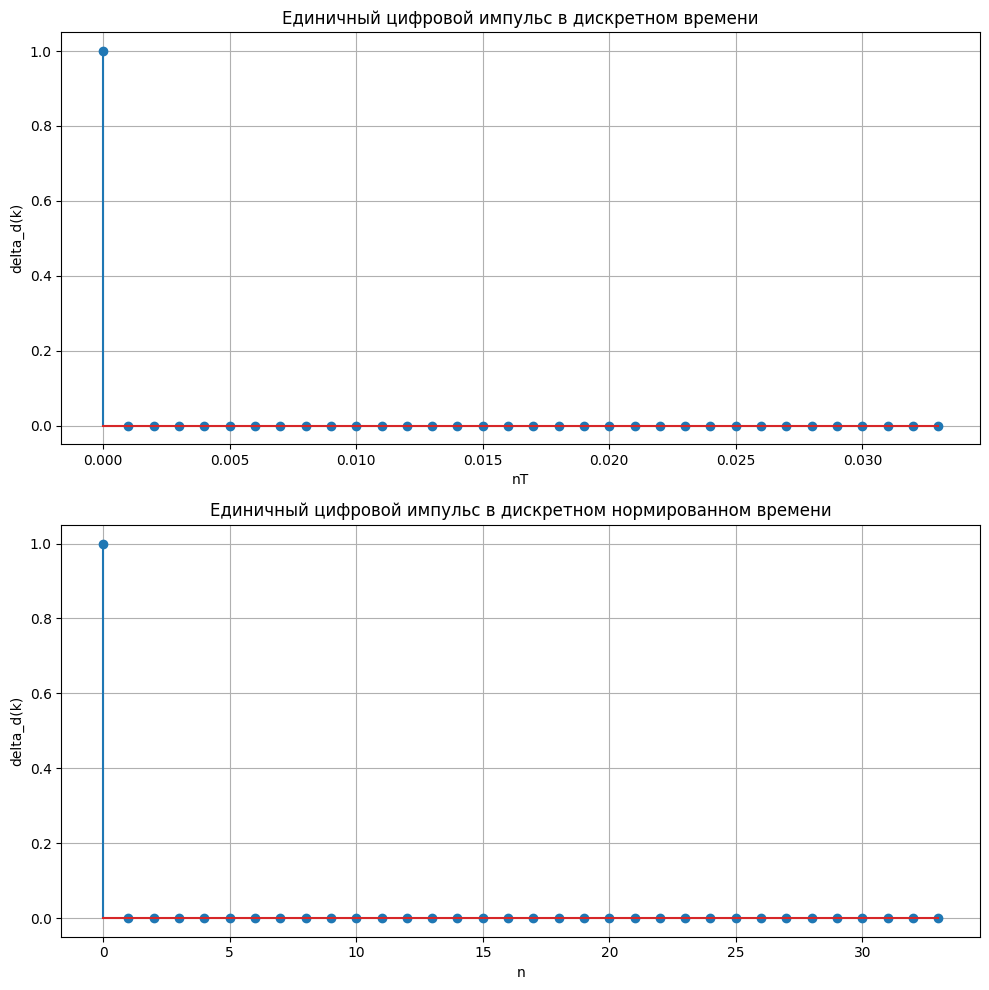

In [44]:
# Моделирование единичного цифрового импульса с выводом графиков дискретного и дискретного нормированного времени.

nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_delta_d(interval, k = 0):
    delta_d = np.zeros(len(interval))
    delta_d[k] = 1
    return delta_d

nT_delta_d = get_delta_d(nT_interval, k=0)
n_delta_d = get_delta_d(n_interval, k=0)

sub_plt1 = sub_plt(
    title='Единичный цифровой импульс в дискретном времени',
    x=nT_interval,
    y=nT_delta_d,
    x_label='nT',
    y_label='delta_d(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Единичный цифровой импульс в дискретном нормированном времени',
    x=n_interval,
    y=n_delta_d,
    x_label='n',
    y_label='delta_d(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (10, 10))


### Задание 2.
Смоделировать дискретный единичный скачок $\sigma_{d}(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить:
- соответствие между дискретным и аналоговым единичными скачками;
- чему равна частота дискретизации дискретного единичного скачка.

a) Соответствие между дискретным и аналоговым единичным скачками.

Дискретный единичный скачок является дискретным аналогом функции единичного скачка (функция Хевисайда).

б) Чему равна частота дискретизации дискретного единичного скачка.

Частота дискретизации для дискретного единичного скачка определяется как величина, обратная величине шага дискретизации: $ f = \frac{1}{T} = \frac{1}{0.001} = 1000 $ Гц

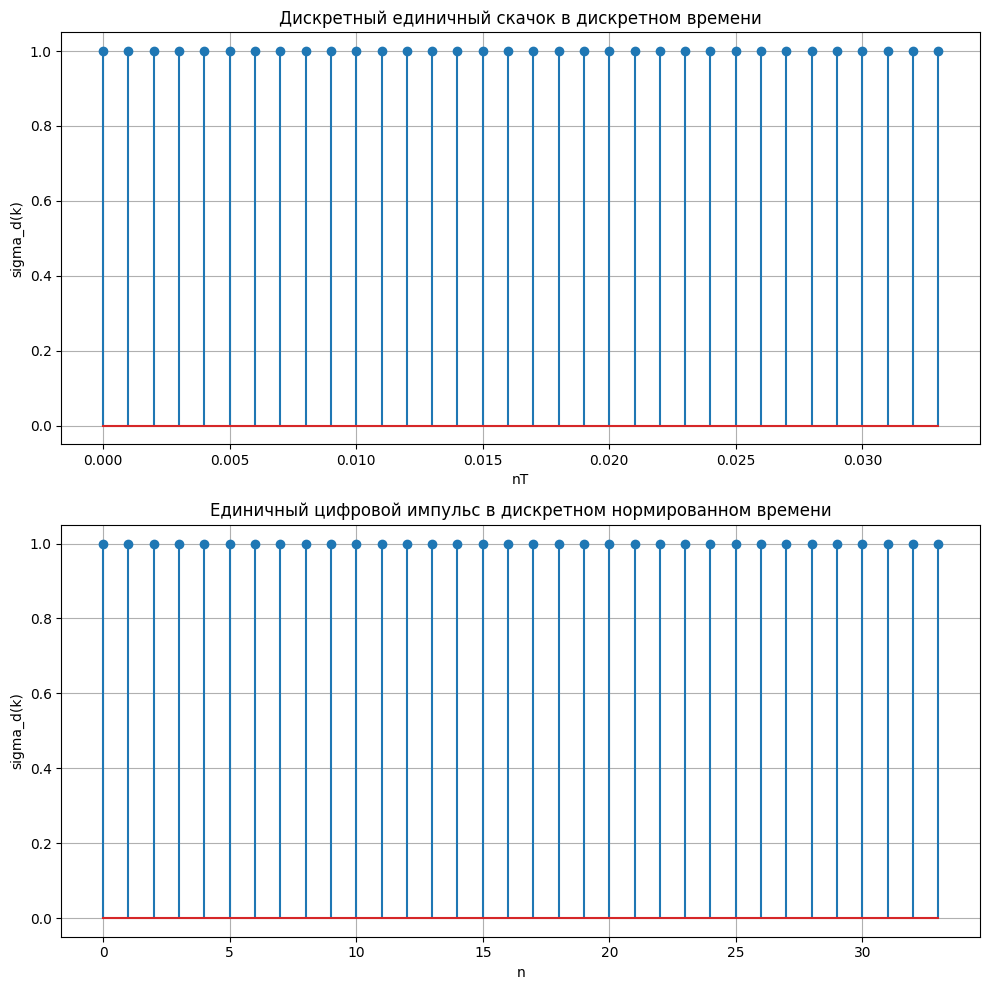

In [39]:
#Моделирование единичного скачка на интервалах дискретного и дискретного нормированного времени.
nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_sigma_d(interval, k=0):
    sigma_d = np.zeros(len(interval))
    sigma_d[k:] = 1
    return sigma_d

nT_sigma_d = get_sigma_d(nT_interval, k=0)
n_sigma_d = get_sigma_d(n_interval, k=0)

sub_plt1 = sub_plt(
    title='Дискретный единичный скачок в дискретном времени',
    x=nT_interval,
    y=nT_sigma_d,
    x_label='nT',
    y_label='sigma_d(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Единичный цифровой импульс в дискретном нормированном времени',
    x=n_interval,
    y=n_sigma_d,
    x_label='n',
    y_label='sigma_d(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (10, 10))


### Задание 3.
Смоделировать дискретную экспоненциальную функцию $s_{1}(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$. Пояснить соответствие между дискретной и аналоговой экспонентами.

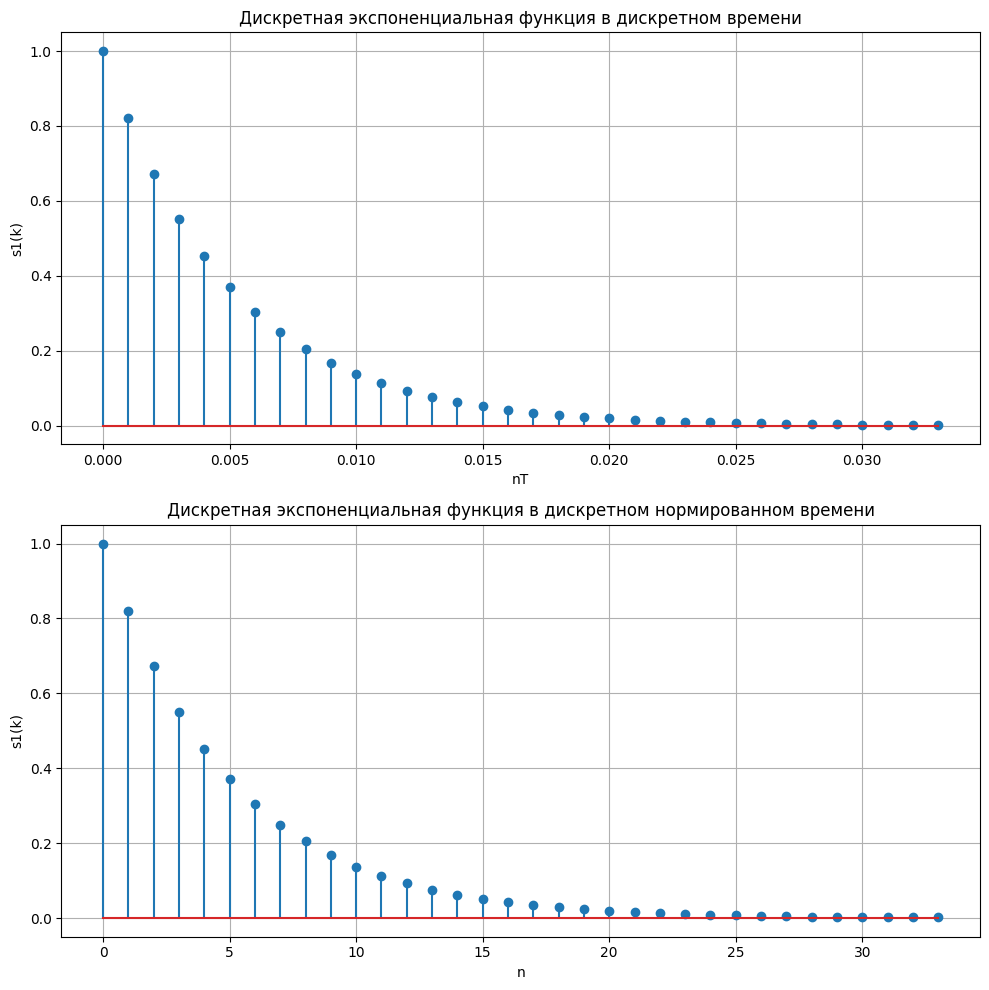

In [40]:
#Моделирование дискретной экспоненциальной функции на интервалах дискретного и дискретного нормированного времени.
nT_interval = np.arange(0, N) * T
n_interval = np.arange(0, N)

def get_s1(a, interval, k=0):
    s1 = np.zeros(len(interval))
    s1[k:] = np.power(a, interval[k:] - k)
    return s1

nT_s1 = get_s1(a, n_interval)

sub_plt1 = sub_plt(
    title='Дискретная экспоненциальная функция в дискретном времени',
    x=nT_interval,
    y=nT_s1,
    x_label='nT',
    y_label='s1(k)',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Дискретная экспоненциальная функция в дискретном нормированном времени',
    x=n_interval,
    y=nT_s1,
    x_label='n',
    y_label='s1(k)',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (10, 10))


Соответствие между дискретной и аналоговой экспонентами: дискретная экпонента представляет собой значение аналоговой экспоненты, взятое в дискретный момент времени.

### Задание 4.
Смоделировать дискретный комплексный гармонический сигнал $s_{2}(k)= C \exp(j \hat{w_0} k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.



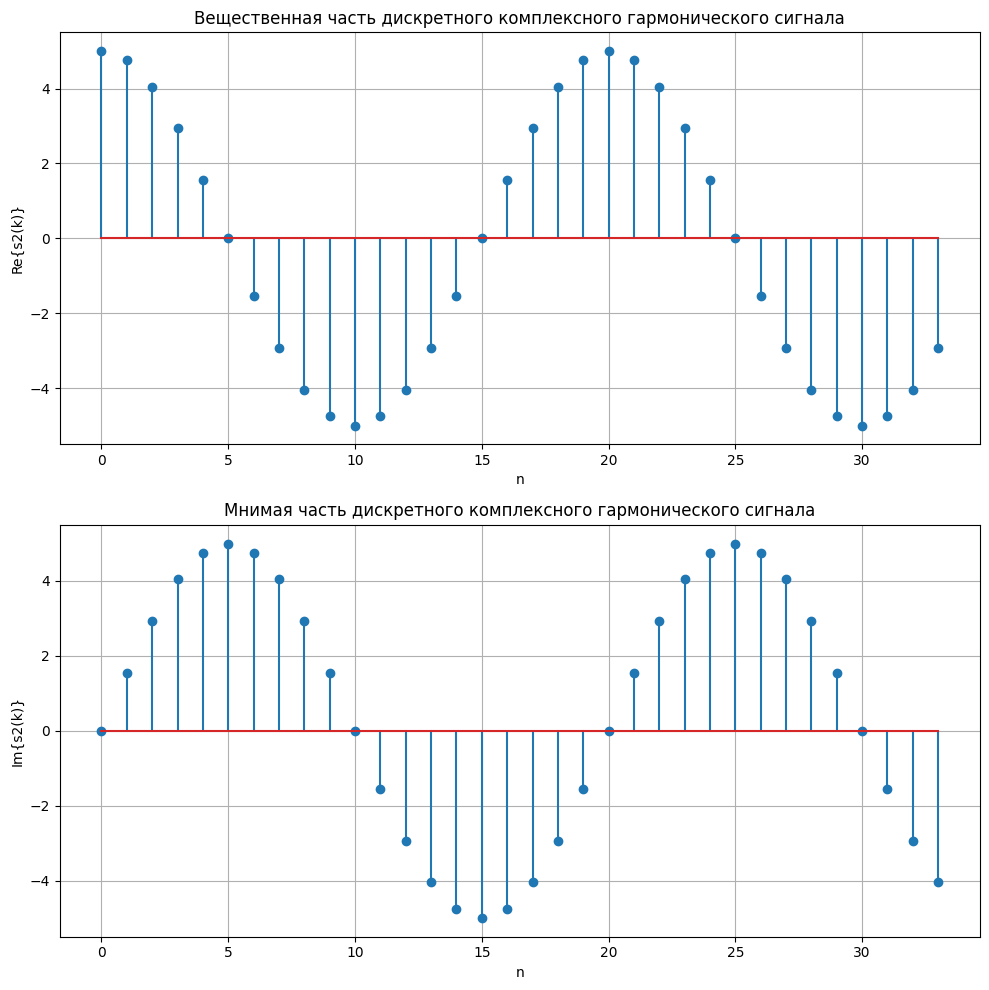

In [45]:
#Моделирование дискретного комплексного гармонического сигнала с графиками вещественной и мнимой частей в дискретном времени. 
n_interval = np.arange(0, N)

def get_s2(C, omega, interval):
    s2 = np.zeros(len(interval))
    s2 = C * np.exp(1j * omega * interval)
    return s2

s2 = get_s2(C, omega, n_interval)
s2_real = np.real(s2)
s2_imag = np.imag(s2)

sub_plt1 = sub_plt(
    title='Вещественная часть дискретного комплексного гармонического сигнала',
    x=n_interval,
    y=s2_real,
    x_label='n',
    y_label='Re{s2(k)}',
    pos=[2, 1, 1])

sub_plt2 = sub_plt(
    title='Мнимая часть дискретного комплексного гармонического сигнала',
    x=n_interval,
    y=s2_imag,
    x_label='n',
    y_label='Im{s2(k)}',
    pos=[2, 1, 2])

graphic([sub_plt1, sub_plt2], (10, 10))

Комплексный гармонический сигнал можно записать в следующем виде: $ s_{2}(k) = C \cdot ( \cos(\hat{w_0}k) + j \sin(\hat{w_0}k) ) $. В данном случае первая последовательность (вещественная часть комплексного сигнала) - $ C \cdot \cos(\hat{w_0}k) $, вторая (мнимая часть комплексного сигнала) - $ C \cdot \sin(\hat{w_0}k) $

### Задание 5.
Вывести графики последовательностей $\delta_{d}(k)$, $\sigma_{d}(k)$ и $s_{1}(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.

1) Дискретный единичный цифровой импульс с задержкой:
$$ \delta_{d}(k) = \begin{cases} 1, k = m \\ 0, k \ne m \end{cases} $$

2) Дискретный единичный скачок с задержкой:
$$ \sigma_{d}(k) = \begin{cases} 1, k \ge m \\ 0, k < m \end{cases} $$

3) Дискретная экспоненциальная функция с задержкой:
$$ s_{1}(k) = \begin{cases} a^{k-m}, k \ge m \\ 0, k < m \end{cases} $$

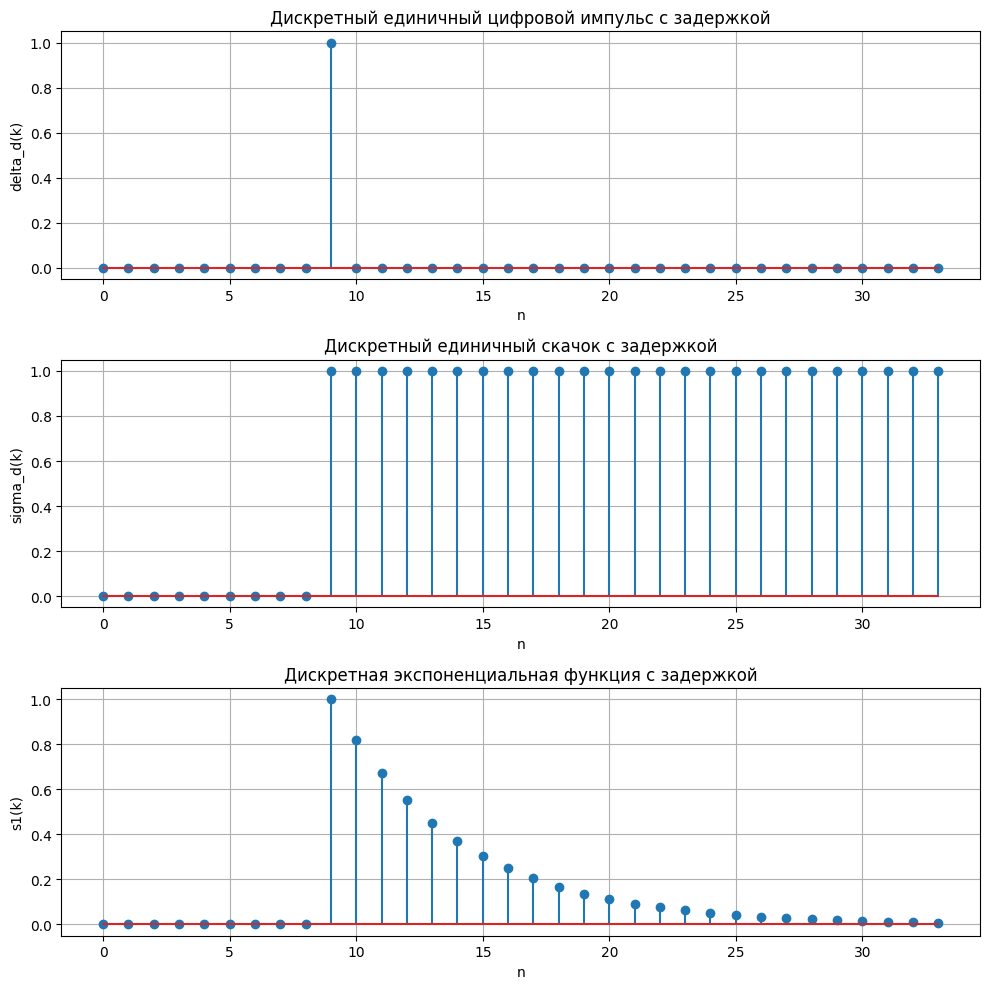

In [46]:
#Моделирование дискретных функций задержанных на m отсчетов: единичный цифровой импульс, единичный скачок, экспоненциальная функция.
n_interval = np.arange(0, N)

delta_delayed = get_delta_d(n_interval, k=m)
sigma_delayed = get_sigma_d(n_interval, k=m)
s1_delayed = get_s1(a=a, interval=n_interval, k=m)

sub_plt1 = sub_plt(
    title='Дискретный единичный цифровой импульс с задержкой',
    x=n_interval,
    y=delta_delayed,
    x_label='n',
    y_label='delta_d(k)',
    pos=[3, 1, 1])

sub_plt2 = sub_plt(
    title='Дискретный единичный скачок с задержкой',
    x=n_interval,
    y=sigma_delayed,
    x_label='n',
    y_label='sigma_d(k)',
    pos=[3, 1, 2])

sub_plt3 = sub_plt(
    title='Дискретная экспоненциальная функция с задержкой',
    x=n_interval,
    y=s1_delayed,
    x_label='n',
    y_label='s1(k)',
    pos=[3, 1, 3])


graphic([sub_plt1, sub_plt2, sub_plt3], (10, 10))

## Выводы
В ходе выполнения лабораторной работы изучены математические описания стандартных дискретных сигналов. Были получены практические навыки моделирования сигналов с помощью программных средств. Рассмотренны сигналы и построены соотвествующие им функции: единичный цифровой импульс, дискретный единичный скачок, дискретная экспоненциальная функция, дискретный комплексный гармонический сигнал.
Полученные результаты подкреплены соответствующими графиками на интервалах дискретного и дискретного нормированного времени и выводами.